In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Model
# from tqdm import tqdm
import pandas as pd
from keras.models import load_model
from glob import glob
import os
import cv2

Using TensorFlow backend.


In [63]:
img1 = '00025290_000.png'

In [4]:
model = load_model('Consolidation.h5')
gap_weights = model.layers[-1].get_weights()[0]
cam_model = Model(inputs=model.input, outputs=(model.layers[-3].output, model.layers[-1].output))

W0729 16:50:51.975390 4499920320 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 16:50:52.166997 4499920320 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 16:50:52.211082 4499920320 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 16:50:52.212095 4499920320 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0729 16:50:52.213030 4499920320 deprecation_wrappe

In [64]:
img = cv2.imread(img1,0)
img = cv2.resize(img, dsize=(224,224))
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
final_image_bg_alpha = img
img = img/255.0

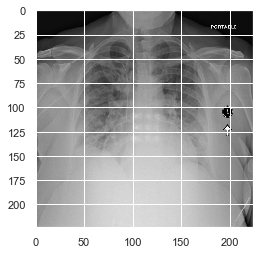

In [65]:
plt.imshow(final_image_bg_alpha)

In [66]:
cam_model = Model(inputs=model.input, outputs=(model.layers[-3].output, model.layers[-1].output))

In [67]:
img = np.expand_dims(img,axis=0)

In [68]:
features, results = cam_model.predict(img)

In [69]:
import seaborn as sns
sns.set()

In [70]:
features.shape

(1, 7, 7, 1024)

In [19]:
features[0,:,:,0]

array([[0.        , 0.00203967, 0.00286201, 0.        , 0.        ,
        0.        , 0.00458931],
       [0.00748624, 0.00717899, 0.00453506, 0.00250488, 0.00570058,
        0.01032292, 0.00704521],
       [0.00229811, 0.00300578, 0.00409052, 0.00593175, 0.00646017,
        0.01357759, 0.00558682],
       [0.        , 0.00012377, 0.00274316, 0.00439492, 0.00026889,
        0.00712987, 0.00206501],
       [0.        , 0.00049695, 0.        , 0.00103788, 0.00350102,
        0.00217441, 0.0046822 ],
       [0.00588581, 0.00289755, 0.        , 0.        , 0.00122493,
        0.00198836, 0.00260615],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]], dtype=float32)

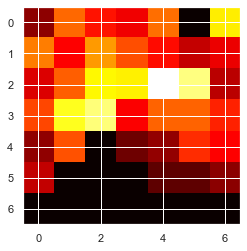

In [71]:
plt.imshow(features[0,:,:,0], cmap='hot', interpolation='nearest')

In [72]:
features_for_one_img = features[0, :, :, :]

In [73]:
height_roomout = 224 / features_for_one_img.shape[0]
width_roomout = 224 / features_for_one_img.shape[1]
cam_features = sp.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)

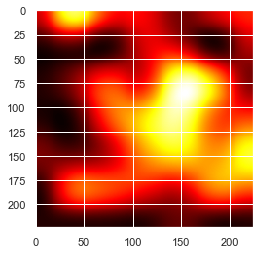

In [80]:
plt.imshow(cam_features[:,:,2], cmap='hot', interpolation='nearest')

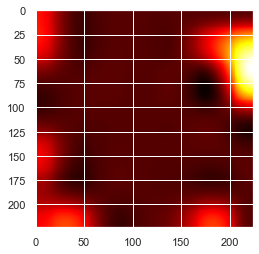

In [24]:
plt.imshow(cam_features[:,:,1], cmap='hot', interpolation='nearest')

In [75]:
cam_activation = gap_weights = model.layers[-1].get_weights()[0]
hmap = np.dot(cam_features, cam_activation)
hmap.shape

(224, 224, 1)

In [76]:
x = np.squeeze(hmap)

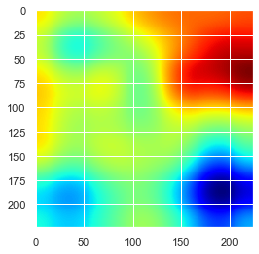

In [77]:
plt.imshow(x, cmap='jet')

In [43]:
hmap = np.uint8(255*hmap)

TypeError: imshow() missing 1 required positional argument: 'X'

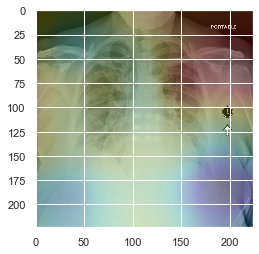

In [78]:
im1 = plt.imshow(final_image_bg_alpha, interpolation='nearest')
im2 = plt.imshow(x, cmap='jet', alpha=0.2, interpolation='bilinear')
plt.imshow()
plt.savefig('hmap1.png')

In [79]:
print(results)

[[0.0600596]]
